In [33]:
# Importing Packages 

import numpy as np 
import pandas as pd 
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib widget
%matplotlib inline 


data_with_NL = pd.read_csv('weatherData_NL.csv')
keep = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa', 'Percip']
data_with_NL = data_with_NL[keep]




# based of the inital scatter matrix, data set lacks distinct clusters? 

# Exploring if there is potential overlap in the data 
#sns.relplot(data=data_with_NL, x='Temp_C', y='Rel Hum_%')
#plt.savefig('ScatterMatrix.png')




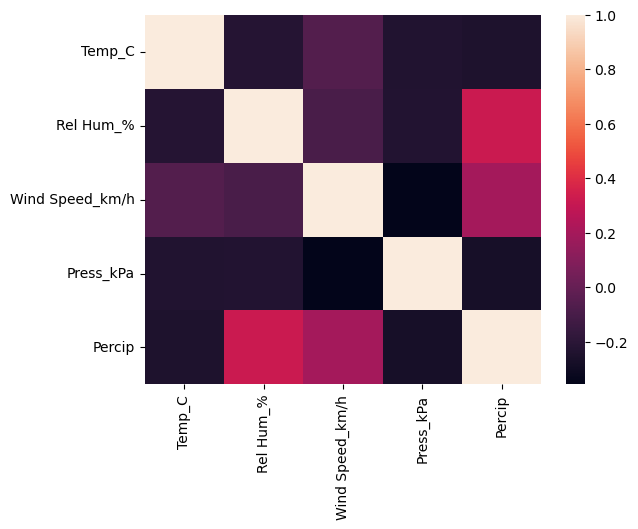

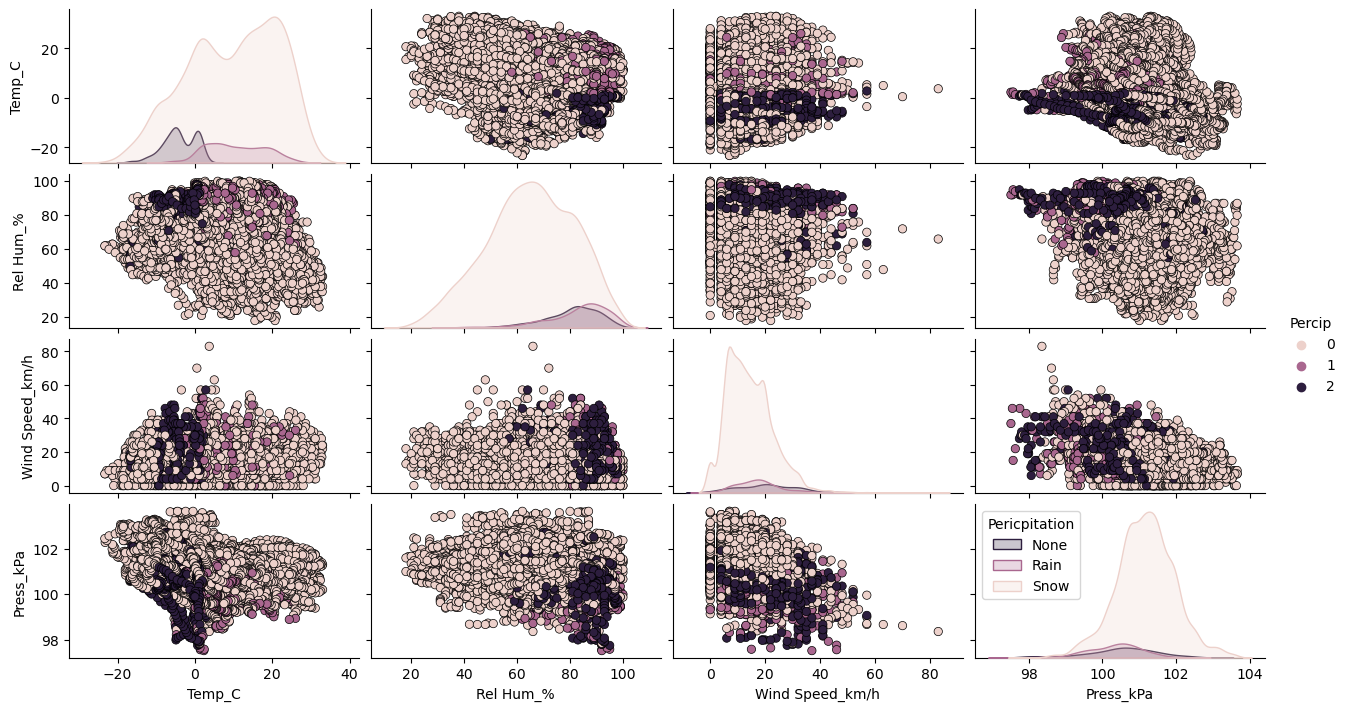

In [9]:
# Computing the correlation matrix 
coor_matrix = data_with_NL.corr() 
sns.heatmap(coor_matrix)
plt.savefig('CorrMatrix.png')


# Computing scatter plot matrix 
p = sns.pairplot(data_with_NL, hue='Percip',height=1.8, aspect=1.8, plot_kws=dict(edgecolor="black", linewidth=0.5))
plt.legend(title='Pericpitation', loc='upper left', labels=['None', 'Rain','Snow'])
plt.savefig('ScatterPlotMatrix.png')

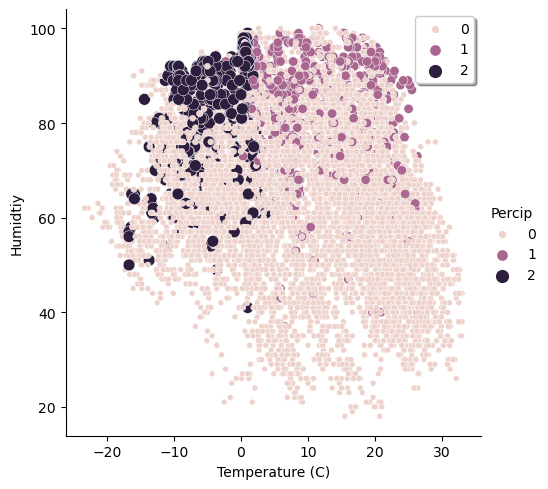

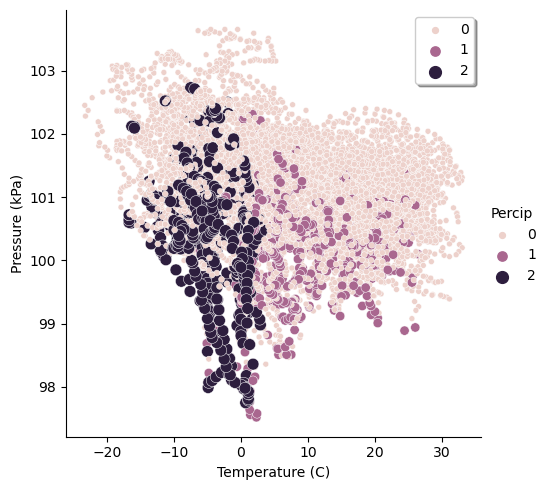

In [10]:
# Based on the scatter plot matrix, the data seesm to lack distinct clusters or atleast is not seperable in 2D 

# Example 1 : Humidity and temperature based on percipitation 
lab = ['None', 'Rain','Snow']
sns.relplot(data=data_with_NL, x='Temp_C', y='Rel Hum_%', size='Percip', hue='Percip') 
plt.xlabel('Temperature (C)') 
plt.ylabel('Humidtiy')
plt.legend(shadow=True)
plt.savefig('Scattter2Dex.png')

# Example 2: 
sns.relplot(data=data_with_NL, x='Temp_C', y='Press_kPa', size='Percip', hue='Percip') 
plt.xlabel('Temperature (C)') 
plt.ylabel('Pressure (kPa)')
plt.legend(shadow=True)
plt.savefig('Scattter2Dex_2.png')


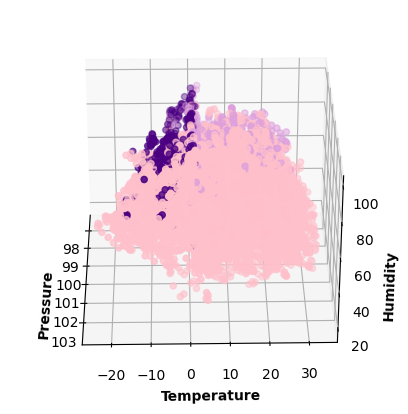

<Figure size 640x480 with 0 Axes>

In [90]:
# Because the data would be hard to cluster in 2D lets visualize What it looks like in 3D 

# Importing packages
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111,projection='3d')


# Humidity.

xs = list(data_with_NL['Press_kPa'])
ys = list(data_with_NL['Temp_C'])
zs = list(data_with_NL['Rel Hum_%'])


# Making zipped data points into tuples 
# data_points = [(x,y,z) for x,y,z in zip(xs,ys,zs)]


# Making array of colors 

allcolors = []
for i in (data_with_NL['Percip']).tolist(): 
    if i==0: 
        color = 'pink' 
    elif i ==1:
        color = 'plum'
    else: 
        color = 'indigo'
        
    allcolors.append(color)
    
    
# for data,color in zip(data_points,allcolors): 
#     p1,p2,p3 = data 
#     ax.scatter(p1, p2, p3, alpha=0.4,c=color,edgecolors='black', s=35)


ax.scatter3D(xs,ys,zs,color=allcolors) #,edgecolor='gray')

for angle in range(0, 360):
    ax.view_init(30, angle)
    
ax.set_ylabel('Temperature', fontweight='bold')
ax.set_zlabel('Humidity', fontweight='bold')
ax.set_xlabel('Pressure', fontweight='bold')
plt.show()
plt.savefig('scatter3Dex1.png')




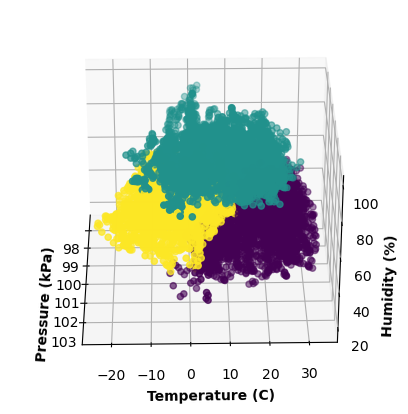

In [85]:
import sklearn 
from sklearn.cluster import KMeans


# Clustering base on three varaiables (pressure, temperature and humidity)
data_with_NL.head()
cv = ['Press_kPa', 'Temp_C', 'Rel Hum_%']
clusterVars = data_with_NL[cv].values

#Going to Try three clusters, if this doesnt work then we can examine the number of ideal clusters 

model_KMeanspp = KMeans(n_clusters=3,init='k-means++', max_iter=600)
# Notes: 
# 3 clusters, 
# Method: k means ++ 
# n_init -> default 
# max itr = 100 -> change once know cost 
# no random state 

clusters= model_KMeanspp.fit(clusterVars)

# sns.countplot(x=clusters)
clusterLabels = clusters.labels_

# Plotting information in 3D 
fig_c = plt.figure(figsize=(10,5))
ax_c = fig_c.add_subplot(111,projection='3d')

xc = clusterVars[:,0]
yc = clusterVars[:,1] 
zc = clusterVars[:,2]

for angle in range(0, 360):
    ax_c.view_init(30, angle)

ax_c.scatter3D(xc, yc, zc,c=clusterLabels)
ax_c.set_xlabel('Pressure (kPa)', fontweight='bold')
ax_c.set_ylabel('Temperature (C)', fontweight='bold')
ax_c.set_zlabel('Humidity (%)', fontweight='bold')
plt.savefig('Clustering3D.png')
plt.show()






In [ ]:
# Compare this to the actual number of results?? 